In [108]:
import sys
sys.path.append("..")
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
from writeit import rewritePipes
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [109]:
def idx_t(i,j,n,N):
    return (2*(N+2)*n+(N+2)*i+j)

In [110]:
fi = "../indata/eq_outflow_test.inp" 
fc ="../indata/eq_outflow_test.config" 

In [143]:
n1 = PyNetwork(fi, fc, 1)
Np = n1.Nedges
A0 = np.ones(n1.Ns[0])*0.00796866547379
Q0 = np.ones(n1.Ns[0])*0.0086
n1.setIC(0,A0,Q0)
M = n1.M
Q00 = 0.0087*np.ones(M+1)
n1.setbVal(0,Q00)
#n1.showCurrentData()
print n1.valves
#n1.showCurrentData()
V0 = np.zeros(M+1)
#for k in range(M/2):
#    V0[k] = 1 
#n1.setValveTimes(0,V0)
#n1.setValveTimes(2,V0)
print n1.valves
print Q00[0]*m32gal*60.

[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0]
137.897811144


In [144]:
V0 =n1.getTotalVolume()
print V0 
dt = n1.T/float(n1.M)
n1.runForwardProblem(dt)

0.0796866547379


3  28.349781
4  28.349781
7  28.349781
10  10.290060
11  10.290060
total outflow = 105.629462
total inflow = 160.888824
initial V = 21.050987
final V = 76.306216
inflow - outflow 55.259362
final- initial= 55.255229
0.0


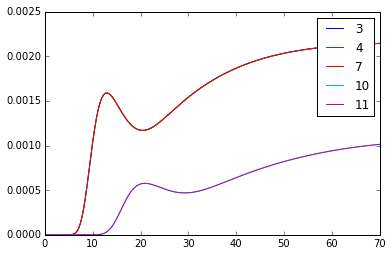

In [145]:
m32gal=264.172052
T = n1.T
qh = n1.qhist(0)
Qin= [qh[idx_t(1,0,n,n1.Ns[0])] for n in range(M+1)]
Qh = []
t = linspace(0,n1.T,M+1)
outflows = [3,4,7,10,11]
"pipe     outflow (gallons)"
for k in outflows:
    qh = n1.qhist(k)
    Qh.append([qh[idx_t(1,n1.Ns[k],n,n1.Ns[k])] for n in range(M+1)])
    plot(t,Qh[-1],label='%d'%k)
    print "%d  %f"  %(k,sum(Qh[-1])*dt*m32gal)
tQin = sum(Qin)*dt*m32gal
tQo = sum([sum(Qh[k])*dt*m32gal for k in range(len(Qh))])
print "total outflow = %f" %(tQo)
print "total inflow = %f"% ((tQin))
print "initial V = %f"%(V0*m32gal)
print "final V = %f"%(n1.getTotalVolume()*m32gal)
print "inflow - outflow %f"%(tQin-tQo )
print "final- initial= %f" %((n1.getTotalVolume()-V0)*m32gal)
legend()
print tQin-m32gal*dt*sum(Q00)

[0.0, 1.0, 1.0]
0.609
0.609
[0.0086999999999999994, 0.0086999999999999994, 0.0086999999999999994, 0.0086999999999999994, 0.0086999999999999994, 0.0086999999999999994, 0.0086999999999999994, 0.0086999999999999994, 0.0086999999999999994, 0.0086999999999999994]
0.60903045


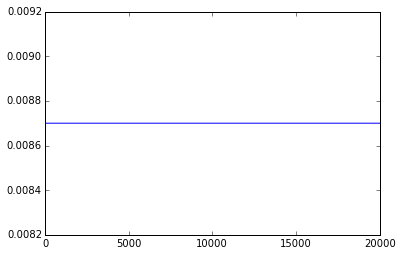

In [139]:
print n1.valves
y = integrate.cumtrapz(Qin, x=None, dx=dt)
print y[-1]
print T*Q00[0]
print Qin[0:10]
print sum(Qin)*dt
plot(Qin)

In [56]:
print n1.valves
n1.showCurrentData()



[1.0, 1.0, 1.0]
At time t = 70.000000
Data from pipe 0
A           Q
0.007294    0.008700
0.007294    0.008700
0.007294    0.008700
0.007293    0.008700
0.007291    0.008700
0.007287    0.008699
0.007280    0.008698
0.007269    0.008696
0.007254    0.008693
0.007235    0.008690
Data from pipe 1
A           Q
0.003151    0.004345
0.003150    0.004344
0.003149    0.004344
0.003148    0.004343
0.003148    0.004342
0.003147    0.004341
0.003146    0.004341
0.003144    0.004340
0.003143    0.004339
0.003142    0.004338
Data from pipe 2
A           Q
0.003141    0.004337
0.003139    0.004336
0.003137    0.004334
0.003136    0.004333
0.003134    0.004332
0.003132    0.004330
0.003130    0.004328
0.003127    0.004326
0.003124    0.004324
0.003122    0.004322
Data from pipe 3
A           Q
0.001534    0.002160
0.001533    0.002158
0.001532    0.002157
0.001530    0.002156
0.001528    0.002154
0.001526    0.002152
0.001525    0.002151
0.001522    0.002149
0.001520    0.002146
0.001518    0.00214

In [9]:
print n1.conn
#pipes with outflow ends are 3,4,7,10,and 11

[[ 0  1]
 [ 1  2]
 [ 2  3]
 [ 3  4]
 [ 3  5]
 [ 1  6]
 [ 6  7]
 [ 7  8]
 [ 7  9]
 [ 9 10]
 [10 11]
 [10 12]]


In [32]:
print fi

../indata/eq_outflow_test.inp


In [48]:
print (dt*n1.Ns[0]/n1.Ls[0])*n1.a[0]

0.16
